<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/intro/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Short recap on important statistical principles



In [2]:
# Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

#To make ploting consitent
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline
plt.style.use('default')
np.random.seed(42)

## The car example

You drive 100 km, how many liters $x$ of gas do you need? We assume that the data is generated by a normal distribution with $\mu=6, 𝜎^2=1$. 

The pdf of the car example. 

Text(0, 0.5, 'p(x) (density)')

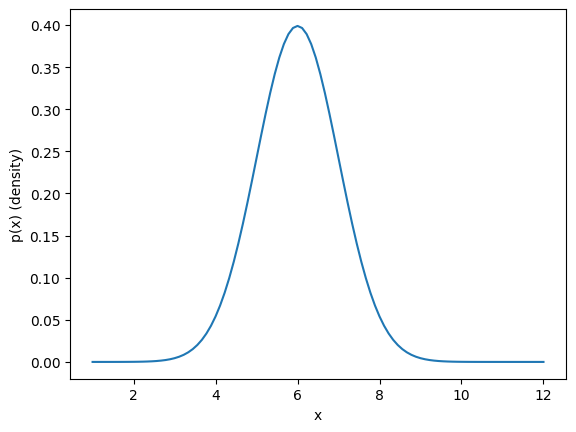

In [3]:
from scipy.stats import norm
dist = norm(loc=6,scale=1)
xv=np.linspace(1,12,100)
plt.plot(xv, dist.pdf(xv))
plt.xlabel('x')
plt.ylabel('p(x) (density)')

### Sampling from the model

We sample one random variable. This comes from the normal distribution. In math:

$$
    x \sim N(6,1)
$$

In [4]:
np.random.normal(loc=6,scale=1)

6.496714153011233

If we sample very many of those, their relative histogram becomes the discribution

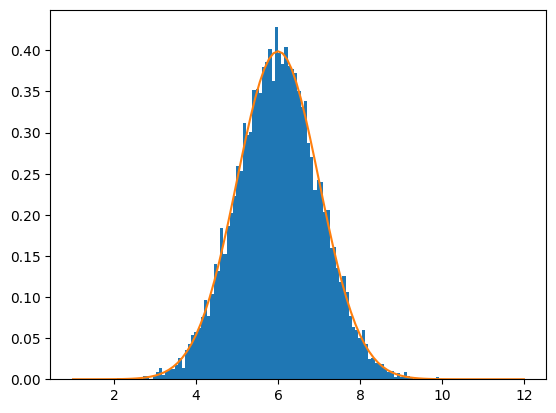

In [5]:
# Repeat several times to see that data varies
x  = np.random.normal(loc=6,scale=1,size=10000) #<--- change to 1e4
x
plt.hist(x, density=True, bins=100) #Need relative
plt.plot(xv, dist.pdf(xv))
plt.show()

### Estimation of the parameters

Copy and paste the values

In [6]:
x = np.array([6.27045683, 5.94976189, 5.76105195, 5.09243634, 5.42322867, 6.75539123, 6.50091719, 5.02244476, 6.09933231, 6.75138712]
)

As diskussed in the lecture, we use the mean and the (emprical) variance as estimators $\hat \mu$ and $\hat \sigma^2$ for $\mu$ and $\sigma^2$

In [7]:
np.mean(x), np.std(x)

(5.962640829, 0.6022245862994148)

## Goodness of estimation

### Sampling Distribution
We repeat the sampling process a large number of times (runs). We record what we estimated. 

In [8]:
n = 10
runs = 10000
mu = np.zeros(runs)
sigma2 = np.zeros(runs)
for i in range(runs):
    x  = np.random.normal(loc=6,scale=1,size=n) #Sampling n 
    m = np.mean(x)
    mu[i] = m #calculation of the estimate
    sigma2[i] = np.mean((x - m)**2)

In [9]:
mu[0:7], sigma2[0:7] #Different values for different runs

(array([6.07457261, 6.19433761, 6.32990325, 6.05471509, 5.87202272,
        5.54728133, 6.10682453]),
 array([0.62857065, 1.04553725, 0.76187242, 1.00960681, 0.44506761,
        0.66140585, 0.63962059]))

In [ ]:
np.mean(mu) #Unbiased for n-->inf you get the true value 6

6.002327015394352

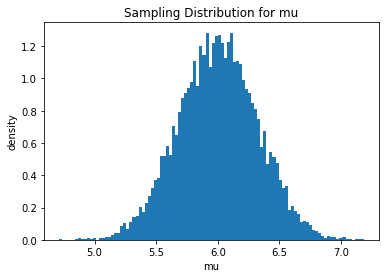

In [ ]:
plt.hist(mu,100, density=True)
plt.xlabel('mu')
plt.ylabel('density')
plt.title('Sampling Distribution for mu')
plt.show()

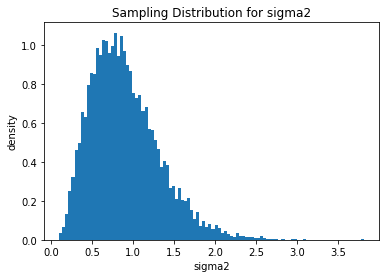

In [ ]:
#Sampling Distribution for sigma
plt.hist(sigma2,100, density=True)
plt.xlabel('sigma2')
plt.ylabel('density')
plt.title('Sampling Distribution for sigma2')
plt.show()

In [ ]:
np.mean(sigma2) #0.898 Oups!!!!

0.8977875553679312

### Little Exercise

Fix estimate for $\hat \sigma^2$.

## The Power of Sampling

Often simpler (but less elegant) to use samples.

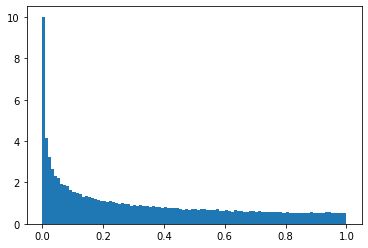

In [22]:
x = np.random.uniform(0,1,100000)
plt.hist(x**2,100, density=True)
plt.show()

In [10]:
np.mean(x**2)

35.992632993693704

# Maximum Likelihood Estimation

Würfelbeispiel aus Vorlesung [not in first lecture]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Probability')

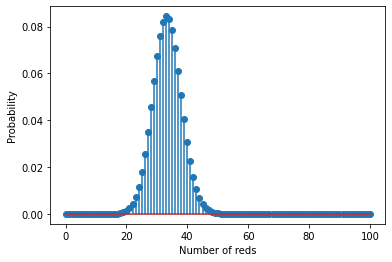

In [ ]:
from scipy.stats import binom
reds = np.asarray(np.linspace(0,100,101), dtype='int') #The numbers 0 to 100 as integers
p_reds = binom.pmf(k=reds, n=100, p=2/6) #The probability of 0,1,2...,throws
plt.stem(reds, p_reds)
plt.xlabel('Number of reds')
plt.ylabel('Probability')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


Text(0, 0.5, ' "Probability" ')

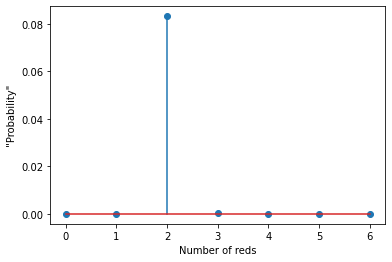

In [ ]:
from scipy.stats import binom
num_reds = np.asarray(np.linspace(0,6,7), dtype='int')
p_l = binom.pmf(k=34, n=100, p=num_reds/6)
plt.stem(num_reds, p_l)
plt.xlabel('Number of reds')
plt.ylabel(' "Probability" ')